<a href="https://colab.research.google.com/github/dauphin95/data_spring/blob/master/%EB%AA%A8%EB%8D%B8%ED%85%8C%EC%8A%A4%ED%8A%B8(PCA)_0_rf-PCA_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#!pip install -U pandas-profiling

In [8]:
import pandas as pd

In [9]:
#import pandas_profiling

In [10]:
df = pd.read_csv('credit_cards_dataset.csv')

In [11]:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [12]:
#df.profile_report()

In [13]:
#df.corr(method='spearman')

In [14]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

PCA for Pay_Score Bill_Amount Pay_Amount

In [15]:
from sklearn.decomposition import PCA

In [16]:
df_Pay_Score = df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

In [17]:
df_Bill_Amount = df[[ 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

In [18]:
df_Pay_Amount = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

In [19]:
df_Pay_Score.head(3)

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0


In [20]:
df_Bill_Amount.head(3)

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913.0,3102.0,689.0,0.0,0.0,0.0
1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0
2,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0


In [21]:
df_Pay_Amount.head(3)

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,689.0,0.0,0.0,0.0,0.0
1,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0


PCA instance 생성

In [22]:
trans = PCA(n_components=1)

In [23]:
X_Pay_Score = df_Pay_Score.values

In [24]:
X_Bill_Amount = df_Bill_Amount.values

In [25]:
X_Pay_Amount = df_Pay_Amount.values

In [26]:
# transform the data
X_dim = trans.fit_transform(X_Pay_Score)

In [27]:
X_dim.shape

(30000, 1)

In [28]:
df_X_dim_Pay_Score = pd.DataFrame(X_dim, columns=['Pay_AVR'])

In [29]:
# transform the data
X_dim = trans.fit_transform(X_Bill_Amount)

In [30]:
df_X_dim_Bill_Amount = pd.DataFrame(X_dim, columns=['Bill_AVR'])

In [31]:
# transform the data
X_dim = trans.fit_transform(X_Pay_Amount)

In [32]:
df_X_dim_Pay_Amount = pd.DataFrame(X_dim, columns=['P_AMT_AVR'])

목표변수 : default.payment.next.month  Input 데이터 셋: X

In [33]:
df = pd.concat([df, df_X_dim_Pay_Score, df_X_dim_Bill_Amount, df_X_dim_Pay_Amount], axis=1)

In [34]:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Pay_AVR,Bill_AVR,P_AMT_AVR
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,-0.516936,-107289.378431,-11443.690236
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1.753527,-103860.702650,-10043.014174
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0.455994,-68874.738469,-8086.514262


In [35]:
X = df.drop(['ID','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month'], axis =1).values

In [36]:
X.shape

(30000, 8)

In [37]:
y = df['default.payment.next.month'].values

Train Test Data Set 분리

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, shuffle=True)

RandomForest 모델 생성 및 학습

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='log2', max_depth=15)

In [42]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
y_predict = rf.predict(X_test)

모델 성능 평가

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
import matplotlib.pyplot as plt

In [46]:
import numpy as np

In [47]:
import itertools

In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[6601  439]
 [1247  713]]


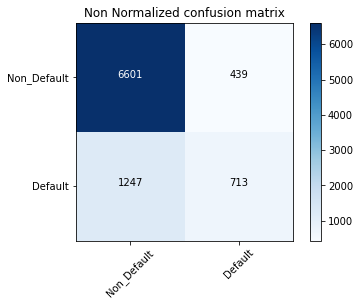

In [49]:
cnf_matrix = confusion_matrix(y_test, y_predict)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')

In [50]:
from sklearn.metrics import recall_score

In [51]:
print("Recall score:"+ str(recall_score(y_test, y_predict)))

Recall score:0.3637755102040816
